# Explore the DataFrame

We want to get a solid understanding of the structure of our DF and its values before jumping into a deeper analysis. <br>
We use many of pandas handy functions to begin with basic analysis for the data, including inspecting column data types <br> and distributions, creating exploratory visualizations, and counting unique and missing values. 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset into a DataFrame
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

# df = pd.concat([train, test], sort=False)
df = train.copy()

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print the first 10 rows
df.head(10)

Number of rows and columns: (365, 12)


,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,7,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,8,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,9,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,10,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


## Understanding columns and values
The [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function prints a concise summary of the DataFrame. For each column, we can find its name, data type, and the number of non-null rows.<br>  This is useful to gauge if there are many missing values and to understand what data we are dealing with. 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          365 non-null    int64  
 1   season      365 non-null    int64  
 2   mnth        365 non-null    int64  
 3   holiday     365 non-null    int64  
 4   weekday     365 non-null    int64  
 5   workingday  365 non-null    int64  
 6   weathersit  365 non-null    int64  
 7   temp        365 non-null    float64
 8   atemp       365 non-null    float64
 9   hum         365 non-null    float64
 10  windspeed   365 non-null    float64
 11  cnt         365 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 34.3 KB


### Data Fields

id         - Unique ID for each entry (numeric)
season     - 1 = spring, 2 = summer, 3 = fall, 4 = winter (categorial). <br>
mnth       - 1 = Januar ... 12 = December (numerical). <br>
holiday    - whether the day is considered a holiday (bool). <br>
Weekday    - 0 = Sunday ... 6 = Saturday (numeric). <br>
workingday - whether the day is neither a weekend nor holiday (bool). <br>
weathersit - (categorial). <br>
             1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br>
             2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
             3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
             4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp       - temperature in Celsius (numeric). <br>
atemp      - "feels like" temperature in Celsius (numeric). <br>
humidity   - relative humidity (numeric). <br>
windspeed  - wind speed (numeric). <br>
count      - number of total rentals (numeric). <br>

The [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function generates helpful descriptive statistics for each numeric column. We can see the percentile, mean, standard deviation, and minimum and maximum values in its output.

In [52]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


To get an exact count of missing values in each column, we call the [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function and aggregate it using the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function:

In [53]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [54]:
def print_by_function(df, function):
    """Generic function to print the result of a function on a DataFrame"""
    print(f'Applying {function.__name__} function to the dataframe')
    for col in df.columns:
        returned_value = function(df[col])
        if len(returned_value) < 20:
            print(col, returned_value, end='\n\n')

We can explore the unique values of each columns by calling the [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function.

In [55]:
print_by_function(df, pd.unique)

Applying unique function to the dataframe
season [1 2 3 4]

mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]

holiday [0 1]

weekday [6 0 1 2 3 4 5]

workingday [0 1]

weathersit [2 1 3]



We use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function to print out the number of rows for each unique value:

In [56]:
print_by_function(df, pd.value_counts)

Applying value_counts function to the dataframe
season 3    94
2    92
1    90
4    89
Name: season, dtype: int64

mnth 1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     28
Name: mnth, dtype: int64

holiday 0    355
1     10
Name: holiday, dtype: int64

weekday 6    53
0    52
1    52
2    52
3    52
4    52
5    52
Name: weekday, dtype: int64

workingday 1    250
0    115
Name: workingday, dtype: int64

weathersit 1    226
2    124
3     15
Name: weathersit, dtype: int64



## Basic data visualizations

Boxplots can help you identify outliers:

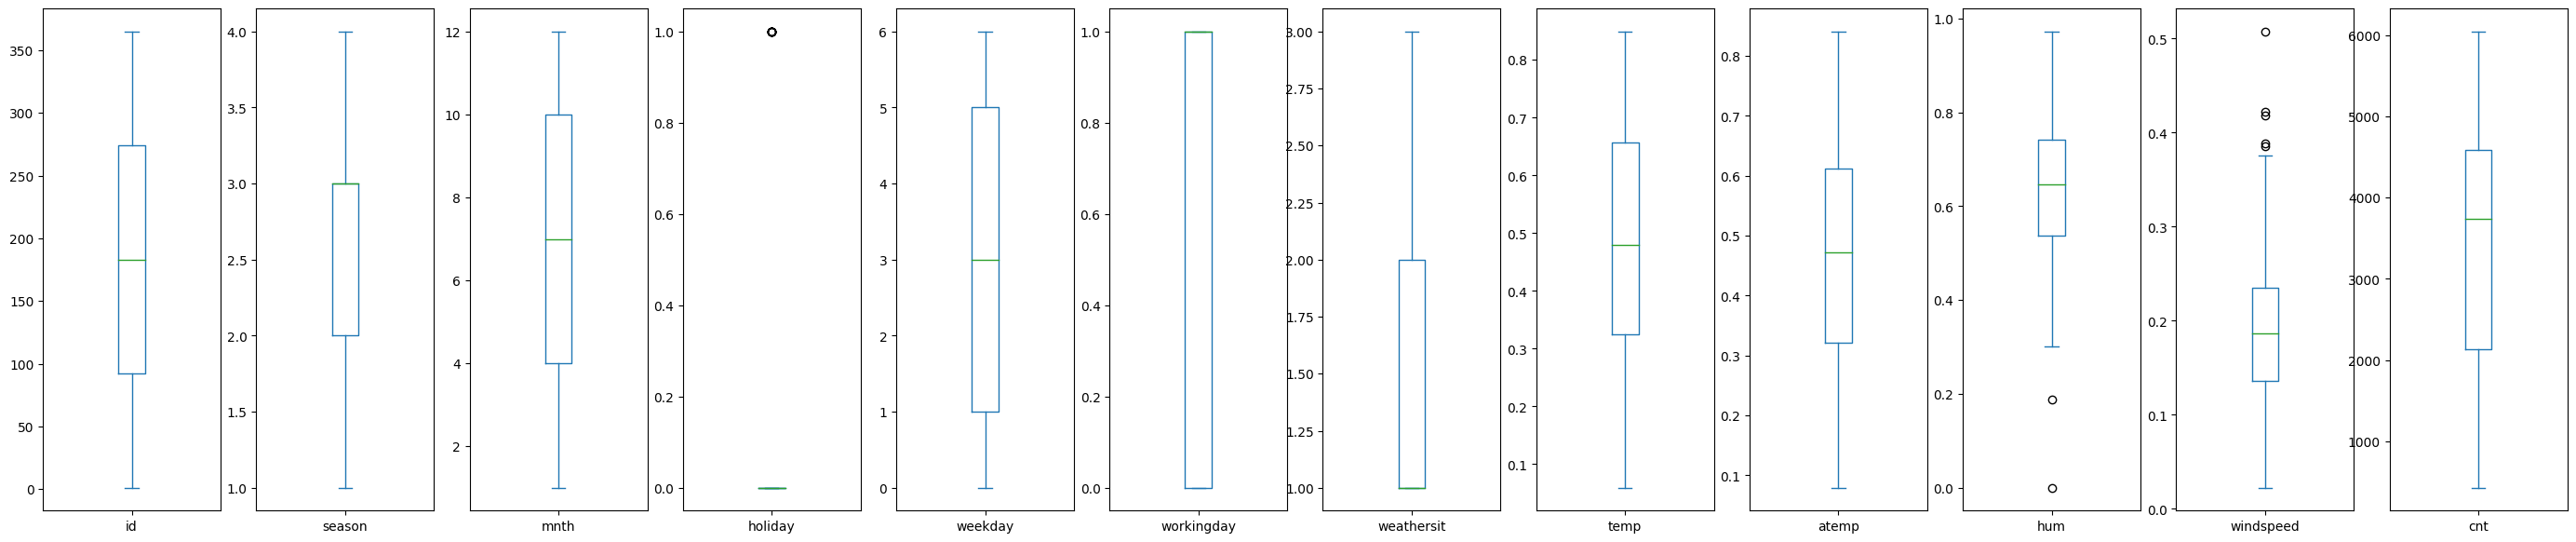

In [57]:
df.plot(kind="box", figsize=(35, 7), subplots=True, sharex=False, sharey=False);